<a href="https://colab.research.google.com/github/Shahsawar51/MY_DATA_SCIENCE_JOURNEY/blob/main/wk27_ridge_regression_with_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class RidgeRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, lambda_=1.0):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.lambda_ = lambda_
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
        y = y.reshape(-1, 1)
        self.theta = np.random.randn(n + 1, 1)  # initialize weights (including bias)

        for _ in range(self.n_iters):
            predictions = X_b.dot(self.theta)
            errors = predictions - y

            gradients = (1 / m) * X_b.T.dot(errors)
            regularization = (self.lambda_ / m) * self.theta
            regularization[0] = 0  # No regularization for bias term

            self.theta -= self.learning_rate * (gradients + regularization)

    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        return X_b.dot(self.theta)

    def get_params(self):
        return self.theta


Learned parameters:
 [[3.90261498]
 [3.04601728]]


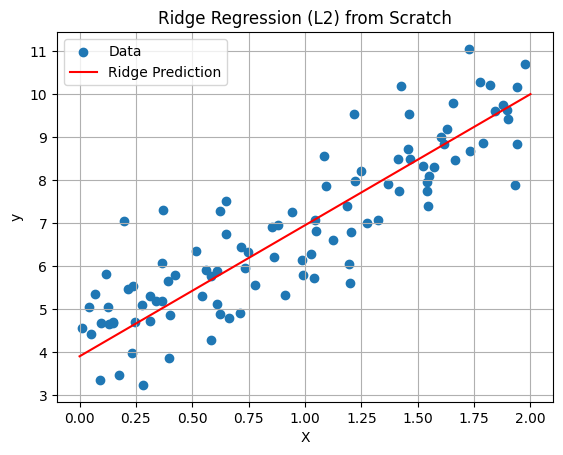

In [ ]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train Ridge Regression
model = RidgeRegression(learning_rate=0.01, n_iters=1000, lambda_=0)
model.fit(X, y)
theta = model.get_params()

print("Learned parameters:\n", theta)

# Plot predictions
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

plt.scatter(X, y, label="Data")
plt.plot(X_test, y_pred, color="red", label="Ridge Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression (L2) from Scratch")
plt.legend()
plt.grid(True)
plt.show()
